In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('community_health_evaluation_dataset.csv')

In [29]:
df.head()

,Participant ID,Age,Gender,SES,Service Type,Visit Frequency,Step Frequency (steps/min),Stride Length (m),Joint Angle (°),EMG Activity,Patient Satisfaction (1-10),Quality of Life Score
0,1,56,F,4,Rehab,Weekly,85,0.54,17.99,Low,1,57
1,2,69,M,1,Preventive,Yearly,80,0.70,13.05,Moderate,8,94
2,3,46,M,4,Rehab,Yearly,81,0.57,29.85,Moderate,4,66
3,4,32,F,1,Consultation,Weekly,66,0.78,28.54,Moderate,9,66
4,5,60,M,3,Preventive,Weekly,73,0.84,20.80,High,5,98


Participant ID: Unique identifier for each participant.

Age: Age of the participants.

Gender: Gender of the participants ('M' for male, 'F' for female).

SES (Socioeconomic Status): Socioeconomic status on a scale of 1 to 4.

Service Type: Type of health service accessed (Rehab, Preventive, Consultation).

Visit Frequency: Frequency of visits (Weekly, Monthly, Yearly).

Step Frequency (steps/min): Average steps per minute.

Stride Length (m): Stride length in meters.

Joint Angle (°): Average joint angle during movement.

EMG Activity: Muscle activity level (Low, Moderate, High).

Patient Satisfaction (1-10): Self-reported satisfaction score.

Quality of Life Score: Score between 50 and 100.

Descriptive Statistics

In [19]:
df.describe()

,Participant ID,Age,SES,Step Frequency (steps/min),Stride Length (m),Joint Angle (°),Patient Satisfaction (1-10),Quality of Life Score
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,174.000000,43.374640,2.357349,80.123919,0.751499,20.057378,5.213256,74.195965
std,100.314505,15.177304,1.129848,11.257582,0.143221,5.807653,2.833643,13.949400
min,1.000000,18.000000,1.000000,60.000000,0.500000,10.060000,1.000000,50.000000
25%,87.500000,31.000000,1.000000,71.000000,0.620000,15.065000,3.000000,62.000000
50%,174.000000,43.000000,2.000000,81.000000,0.760000,20.190000,5.000000,74.000000
75%,260.500000,56.000000,3.000000,90.000000,0.860000,25.220000,8.000000,86.000000
max,347.000000,69.000000,4.000000,99.000000,1.000000,29.970000,10.000000,99.000000


Age: The participants range in age from 18 to 69, with an average age of about 43 years.

Socioeconomic Status (SES): SES ranges from 1 to 4, with a mean of 2.36, indicating a broad distribution across the socioeconomic scale.

Step Frequency (steps/min): Participants take between 60 and 99 steps per minute, with an average of 80 steps/min.

Stride Length (m): Stride length ranges from 0.5 to 1.0 meters, with an average of 0.75 meters.

Joint Angle (°): Joint angles during movement range from 10.06° to 29.97°, with a mean of 20.06°.

Patient Satisfaction: The self-reported satisfaction ranges from 1 to 10, with an average score of 5.21.

Quality of Life Score: Scores range from 50 to 99, with an average of 74.20.

In [7]:
df.dtypes

Participant ID                   int64
Age                              int64
Gender                          object
SES                              int64
Service Type                    object
Visit Frequency                 object
Step Frequency (steps/min)       int64
Stride Length (m)              float64
Joint Angle (°)                float64
EMG Activity                    object
Patient Satisfaction (1-10)      int64
Quality of Life Score            int64
dtype: object

In [30]:
# converting object data type to floats
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
obj = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

for i in range(0, obj.shape[1]):
    obj.iloc[:,i] = le.fit_transform(obj.iloc[:,i])

obj = obj.astype("int")
df = pd.concat([obj, num], axis=1)

Correlation Analysis

In [21]:
correlation_matrix = df.corr()

In [10]:
print(correlation_matrix)

                               Gender  Service Type  Visit Frequency  \
Gender                       1.000000     -0.058295         0.040352   
Service Type                -0.058295      1.000000        -0.052388   
Visit Frequency              0.040352     -0.052388         1.000000   
EMG Activity                -0.068885     -0.021174         0.016965   
Participant ID               0.008243     -0.027371        -0.021523   
Age                          0.014453     -0.002054        -0.003262   
SES                          0.003850     -0.018457         0.000674   
Step Frequency (steps/min)   0.110336      0.015736         0.020409   
Stride Length (m)           -0.071637      0.017132         0.009780   
Joint Angle (°)             -0.007062      0.063204        -0.004920   
Patient Satisfaction (1-10)  0.035180     -0.048662        -0.006381   
Quality of Life Score       -0.003292     -0.099519         0.061406   

                             EMG Activity  Participant ID      

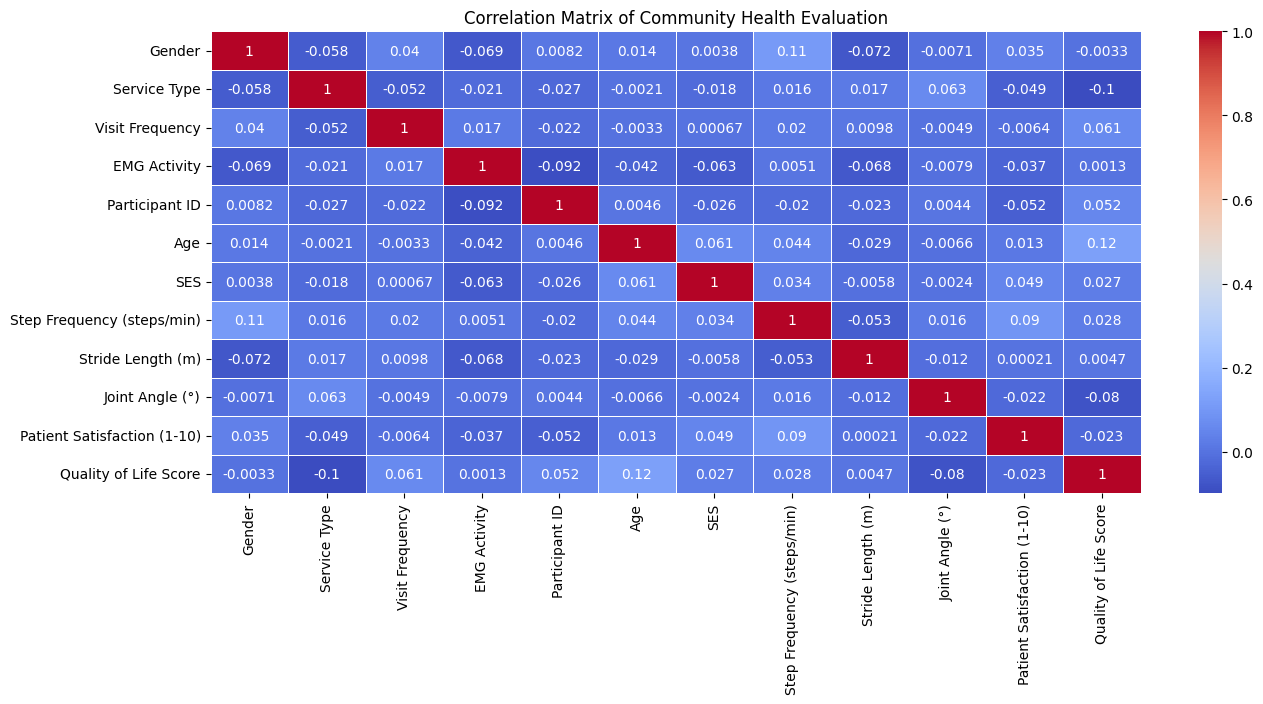

In [13]:
# Plotting the correlation heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Community Health Evaluation')
plt.show()

Age and Quality of Life Score: A weak positive correlation (0.12) suggests that older participants may report slightly higher quality of life scores.

Step Frequency and Patient Satisfaction: A positive correlation (0.09) indicates a minor relationship between higher step frequency and increased patient satisfaction.

Joint Angle and Quality of Life: There is a weak negative correlation (-0.08), indicating that larger joint angles may slightly correlate with lower quality of life scores.

These correlations are quite weak overall, suggesting no strong linear relationships between the variables.

Grouping Analysis

In [6]:
# Grouping by Gender, Service Type, and SES to analyze mean values for satisfaction and quality of life

gender_group = df.groupby('Gender')[['Patient Satisfaction (1-10)', 'Quality of Life Score']].mean()
service_type_group = df.groupby('Service Type')[['Patient Satisfaction (1-10)', 'Quality of Life Score']].mean()
ses_group = df.groupby('SES')[['Patient Satisfaction (1-10)', 'Quality of Life Score']].mean()

gender_group, service_type_group, ses_group

(        Patient Satisfaction (1-10)  Quality of Life Score
 Gender                                                    
 F                          5.119565              74.239130
 M                          5.319018              74.147239,
               Patient Satisfaction (1-10)  Quality of Life Score
 Service Type                                                    
 Consultation                     5.333333              75.051282
 Preventive                       5.302521              75.789916
 Rehab                            4.990991              71.585586,
      Patient Satisfaction (1-10)  Quality of Life Score
 SES                                                    
 1                       5.037383              72.859813
 2                       5.253012              76.204819
 3                       5.156627              73.602410
 4                       5.486486              74.540541)

Gender: Differences between males and females in terms of satisfaction and life quality, this point to gender-specific trends in healthcare outcomes.

Service Type: Consultation received higher satisfaction scores, while preventive recieved higher quality of life score

SES: Socioeconomic status could significantly impact patient satisfaction and quality of life, with higher SES possibly correlating with better outcomes.

Regression Analysis

In [31]:
import statsmodels.api as sm

In [32]:
# Define independent variables (features) and dependent variable (target)
# Let's use 'Patient Satisfaction (1-10)' as the dependent variable
X = df[['Age', 'SES', 'Step Frequency (steps/min)', 'Stride Length (m)', 'Joint Angle (°)',
        'Gender', 'Service Type', 'Visit Frequency', 
        'EMG Activity']]

y = df['Patient Satisfaction (1-10)']

In [33]:
# Add a constant to the independent variables
X = sm.add_constant(X)

In [34]:
# Perform the regression
model = sm.OLS(y, X).fit()

In [35]:
# Print the summary of the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Patient Satisfaction (1-10)   R-squared:                       0.015
Model:                                     OLS   Adj. R-squared:                 -0.011
Method:                          Least Squares   F-statistic:                    0.5642
Date:                         Wed, 16 Oct 2024   Prob (F-statistic):              0.826
Time:                                 21:31:46   Log-Likelihood:                -850.70
No. Observations:                          347   AIC:                             1721.
Df Residuals:                              337   BIC:                             1760.
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

A p-value less than 0.05 typically suggests that the variable significantly impacts the dependent variable.

R-squared measures how much of the variance in the dependent variable is explained by the independent variables.

Coefficients tell us how much the dependent variable changes for a one-unit change in the independent variable, holding other variables constant.

In [36]:
# Define independent variables (features) and dependent variable (target)
# Let's use 'Quality of Life Score' as the dependent variable
X = df[['Age', 'SES', 'Step Frequency (steps/min)', 'Stride Length (m)', 'Joint Angle (°)',
        'Gender', 'Service Type', 'Visit Frequency', 
        'EMG Activity']]

y = df['Quality of Life Score']

In [37]:
# Add a constant to the independent variables
X = sm.add_constant(X)

In [38]:
# Perform the regression
model = sm.OLS(y, X).fit()

In [39]:
# Print the summary of the regression results
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Quality of Life Score   R-squared:                       0.035
Model:                               OLS   Adj. R-squared:                  0.009
Method:                    Least Squares   F-statistic:                     1.360
Date:                   Wed, 16 Oct 2024   Prob (F-statistic):              0.205
Time:                           21:39:51   Log-Likelihood:                -1400.2
No. Observations:                    347   AIC:                             2820.
Df Residuals:                        337   BIC:                             2859.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

A p-value less than 0.05 typically suggests that the variable significantly impacts the dependent variable.

R-squared measures how much of the variance in the dependent variable is explained by the independent variables.

Coefficients tell us how much the dependent variable changes for a one-unit change in the independent variable, holding other variables constant.